In [17]:
# imports
from scipy.stats import norm, chi2, t, f
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [18]:
# constants
PI = math.pi
e = math.e
P_VALUE = 2

In [19]:
# the data from project 1
data = pd.read_csv("athletes_edited.csv")
display(data)

,nationality,sport,age,male,height,weight,won_any,won_gold,total_medals
0,ESP,athletics,46,1,172,64,0,0,0
1,KOR,fencing,29,0,168,56,0,0,0
2,CAN,athletics,24,1,198,79,1,0,1
3,MDA,taekwondo,25,1,183,80,0,0,0
4,NZL,cycling,25,1,181,71,0,0,0
...,...,...,...,...,...,...,...,...,...
10853,CUB,athletics,20,0,164,58,0,0,0
10854,CZE,athletics,29,0,173,63,0,0,0
10855,CHN,wrestling,25,1,185,100,0,0,0
10856,VIE,weightlifting,27,1,160,56,0,0,0


The research question we chose for this part:
Does the average weight (X) of the athletes change between the athletes who won a medal (Y=1) and the ones who didn't (Y=0)?

Notations:

- Let $\mu_x^1$ be the expectation of athletes' weight who didn't win any medal.

- Let $\mu_x^2$ be the expectation of athletes' weight who won a medal.

In [20]:
# the relevent data for our research question
not_won_data, won_data = data[data["won_any"] == 0], data[data["won_any"] == 1]

# **PART 1 - Estimation**

We will find the average of each category.

In [21]:
display(data[["won_any", "weight"]].groupby("won_any").mean()) 

,weight
won_any,
0,71.574300
1,74.650314


As we can see, the average weight of athletes who won a medal is higher than the average weight of athletes who didn't (by around 3kg).

Now, we'll find the approximated confidence interval for $\mu_x^1$ and $\mu_x^2$.

We will set $\alpha = 0.05$ to get the approximated confidence level of 0.95.

According to the "Central Limit Theorem" the sample mean is asymptotically Normal with $(\theta,\space \sigma^2/n)$.
We saw in the lectures that if we replace the variance with an estimator to the variance then the sample mean will still be asymptotically Normal with $(\theta,\space \hat\sigma^2/n)$.

In the question, we use $\hat\sigma^2 = S^2$.

Therefore, we can assume that the sample mean is asymptotically Normal with $(\theta,\space \hat\sigma^2/n)$.

In [22]:
def get_conf_interval(data, col_to_avg="weight"):
    mean, s_squared, n = data[col_to_avg].mean(), data[col_to_avg].var(), len(data)

    se = (s_squared / n)**0.5

    # the 0.975 quantile of standard normal distribution
    nq = norm.ppf(0.975)


    confidence_interval = [(mean - (nq * se)).round(4), (mean + (nq * se)).round(4)]
    return confidence_interval


conf_interval_not_won = get_conf_interval(not_won_data)
print("Confidence interval for mu_x0 at approximated confidence level of 0.95:")
print(conf_interval_not_won)

print()

conf_interval_won = get_conf_interval(won_data)
print("Confidence interval for mu_x1 at approximated confidence level of 0.95:")
print(conf_interval_won)


Confidence interval for mu_x0 at approximated confidence level of 0.95:
[71.2443, 71.9043]

Confidence interval for mu_x1 at approximated confidence level of 0.95:
[73.8813, 75.4193]


As we can see, the confidence intervals don't overlap.

Therefore, we can conclude that if the confidence intervals indeed trap the true parameters, then they can't be equal to each other. 

# **PART 2 - Hypothesis Testing**

Let us be reminded of our notation:

- Let $\mu_x^1$ be the expectation of athletes' weight who didn't win any medal.

- Let $\mu_x^2$ be the expectation of athletes' weight who won a medal.
  

The hypotheses:

$H_0: \mu_x^1 = \mu_x^2$

$H_1: \mu_x^1 \ne \mu_x^2$


# Conditions of T Test
In order to use T test, we need the following conditions:

- The samples of each group are distributed Normally.
- The variances of the groups are equal.
- The two samples are independent, and the records in each sample are independent as well.

## Testing Normality

First, we'll check if the samples of each group are distributed Normally.

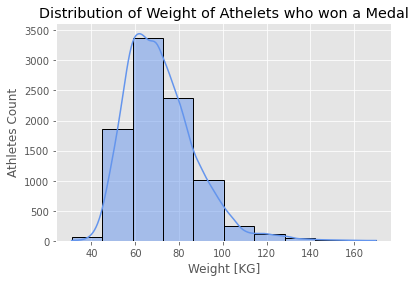

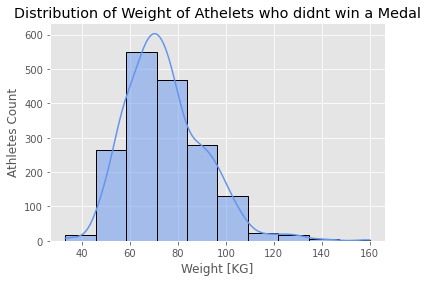

In [33]:
# set style for all the graphs we will show.
plt.style.use('ggplot')

def get_hist(data, col_hist, won=False, bins=10):
    values = data[col_hist].tolist()

    won_title = "didnt win"

    if won == 0:
        won_title = "won"

    plt.title(f"Distribution of {col_hist.capitalize()} of Athelets who {won_title} a Medal")
    plt.xlabel(f"{col_hist.capitalize()} [KG]")
    plt.ylabel("Athletes Count")
    sns.histplot(values, bins=bins, kde=True, edgecolor='black', linewidth=1, color="cornflowerblue")
    plt.show()
    print()


get_hist(not_won_data, col_hist="weight")
get_hist(won_data, col_hist="weight", won=True)

As we can see below, the samples of each group seem (quality wise) to be distributed Normally, as needed for the T test.

## Applying F Test for Variance Equality

Second, we will check if the variances of the groups are equal.

- Let $V_x^1$ be the variance of athletes' weight who didn't win any medal.

- Let $V_x^2$ be the variance of athletes' weight who won a medal.

We will use F test with a level of $\alpha = 0.05$ on the following hypotheses:

$H_0: V_x^1 = V_x^2$

$H_1: V_x^1 \ne V_x^2$

In [24]:
n1 = len(not_won_data)
not_won_s_squared = not_won_data["weight"].var()

n2 = len(won_data)
won_s_squared = won_data["weight"].var()

print(f"The parameters of the distribution are: ({n1-1}, {n2-1}) \n")

F = not_won_s_squared / won_s_squared

# the 0.95 quantile of the F distribution with (9104, 1752) parameters
fq = f.ppf(0.95, 9104, 1752)

# the reject region
reject_h0 = F > fq

if reject_h0:  
    print(f"The result of our test is --- Reject H_0")
else:
    print(f"The result of the test is --- Retain H_0")




The parameters of the distribution are: (9104, 1752) 

The result of the test is --- Retain H_0


As we can see, we retain $H_0$, meaning we can conclude that the variances are equal at level of $\alpha = 0.05$.

Thus, we showed that:
- the samples are normally distributed.
- the variances are equal.
- We can assume the independence condition (by the way the data was collected).

And so, we showed all the necessary conditions for using T test. Therefore, we can use it.

# Applying T Test

So, we'll apply T test for difference in means (when the samples are independent and the variances are equal but unknown) with level of $\alpha$ = 0.05, to check our hypotheses:

$H_0: \mu_x^1 - \mu_x^2 = 0$

$H_1: \mu_x^1 - \mu_x^2 \ne 0$

In [25]:
n1 = len(not_won_data)
mean1 = not_won_data["weight"].mean()
s1_squared = not_won_data["weight"].var()

n2 = len(won_data)
mean2 = won_data["weight"].mean()
s2_squared = won_data["weight"].var()

print(f"The number of DF of the distribution is: {n1 + n2 - 2} DF\n")

s_p = (((n1 - 1)*s1_squared + (n2 - 1)*s2_squared) / (n1 + n2 - 2)) ** 0.5

T = (mean1 - mean2) / (s_p * (((1 / n1) + (1 / n2)) ** 0.5))

print(f"The T test statistic for our sample: {T:.4f} \n")

# the 0.975 quantile of the t distribution with 10856 DF
tq = t.ppf(0.975, 10856)


# the reject region
reject_h0 = abs(T) > tq

if reject_h0:  
    print(f"The result of our test is --- Reject H_0")
else:
    print(f"The result of the test is --- Retain H_0")

The number of DF of the distribution is: 10856 DF

The T test statistic for our sample: -7.3145 

The result of our test is --- Reject H_0


The result of our test statistic is $t = -7.3145$.

p-value = $2F(-|t|)) = 2F(-|-7.3145|)) = 2.765*10^{-13}$

($F$ is the cumulative distribution function of t distribution with 10856 DF)

# Applying Wald Test
Now, we'll apply the Wald test for the mean difference with level of $\alpha = 0.05$ for checking our hypotheses:

$H_0: \mu_x^1 - \mu_x^2 = 0$

$H_1: \mu_x^1 - \mu_x^2 \ne 0$

In [26]:
def wald_test(not_won_data, won_data):

    res = []

    n1 = len(not_won_data)
    mean1 = not_won_data["weight"].mean()
    s1_squared = not_won_data["weight"].var()

    n2 = len(won_data)
    mean2 = won_data["weight"].mean()
    s2_squared = won_data["weight"].var()

    se_hat = ((s1_squared / n1) + (s2_squared / n2)) ** 0.5

    W = (mean1 - mean2)  / se_hat

    res.append(f"The Wald test statistic for our sample: {W:.4f} \n")

    # the 0.975 quantile of standart normal distribution
    nq = norm.ppf(0.975)

    # the reject region
    reject_h0 = abs(W) > nq
    
    if reject_h0:  
        res.append(f"The result of our test is --- Reject H_0")
    else:
        res.append(f"The result of the test is --- Retain H_0")

    pv = 2*norm.cdf(-abs(W)).round(17)
    res.append(pv)


    return res


res = wald_test(not_won_data, won_data)

for i in range(2):
    print(res[i])

The Wald test statistic for our sample: -7.2047 

The result of our test is --- Reject H_0


The result of our test statistic is $w = -7.2047$.

p_value = $2\Phi(-|w|)) = 2\Phi(-|-7.2047|)) = 5.8174*10^{-13}$

($\Phi$ is the cumulative distribution function of the standart normal distribution).

As we can see, the results for both tests are the same (to reject $H_0$).

In addition, we can see that the p_value for the T test ($2.765*10^{-13}$) is a little lower than the p_value for Wald test ($5.804*10^{-13}$).

# Applying Likelihood-Ratio Test
Now, we'll apply the "Likelihood-Ratio Test" to check our hypotheses:

$H_0: \mu_x^1 - \mu_x^2 = 0$

$H_1: \mu_x^1 - \mu_x^2 \ne 0$


The MLE of $\Theta$ parameter space is $(\bar{X_1},\bar{X_2})$ where:

- $\bar{X_1}$ is the average athletes' weight who didn't win a medal.
- $\bar{X_2}$ is the average athletes' weight who won a medal.


The MLE of $\Theta_0$ parameter space is $\bar{X}$ where:

$\bar{X}$ is the average athletes' weight (across all athletes).

*We have seen these results in our HW.

In [27]:
# convert dfs to lists
not_won_weight_lst = not_won_data["weight"].tolist()
won_weight_lst = won_data["weight"].tolist()
weight_lst = data["weight"].tolist()

# find L1
n1 = len(not_won_data)
mean1 = not_won_data["weight"].mean()
s1_squared = not_won_data["weight"].var()

n2 = len(won_data)
mean2 = won_data["weight"].mean()
s2_squared = won_data["weight"].var()

# total records
n = n1+n2

s_p_squared = (((n1 - 1)*s1_squared + (n2 - 1)*s2_squared) / (n1 + n2 - 2))
coeffi = -(n / 2) * math.log(2 * PI * s_p_squared)

summ1 = 0
for xi in not_won_weight_lst:
    summ1 += -(1 / (2 * s_p_squared)) * ((xi - mean1) ** 2)

summ2 = 0
for xj in won_weight_lst:
    summ2 += -(1 / (2 * s_p_squared)) * ((xj - mean2) ** 2)

log_L1 = coeffi + summ1 + summ2

# find L2
mean = data["weight"].mean()

s_squared = data["weight"].var()

coeffi = -(n / 2) * math.log(2 * PI * s_squared)


summ = 0
for xi in weight_lst:
    summ += -(1 / (2 * s_squared)) * ((xi - mean) ** 2)

log_L2 = coeffi + summ

LAMBDA = 2 * (log_L1 - log_L2)

print(f'The "Likelihood-Ratio Test" test statistic for our sample: {LAMBDA:.4f} \n')

# the 0.95 quantile of the chi-squared distribution with (2-1=1) df
# (the dimension of theta is 2 and the dimension of theta_0 is 1) 
chisq = chi2.ppf(0.95, 1)

# the reject region
reject_h0 = LAMBDA > chisq

if reject_h0:  
    print(f"The result of our test is --- Reject H_0")
else:
    print(f"The result of the test is --- Retain H_0")

The "Likelihood-Ratio Test" test statistic for our sample: 53.3808 

The result of our test is --- Reject H_0


As we can see, we reject $H_0$, meaning we can conclude that the expections $\mu_x^1,\space \mu_x^2$ are not equal at level of $\alpha = 0.05$.

# PART 3 - Different Sample Sizes

In [28]:
def check_diff_sample_sizes(data, sample_sizes, seed):

    not_won_samples, won_samples = [], []
    for n in sample_sizes:
        temp_df = data.sample(n=n, random_state=seed)

        not_won_samples.append(temp_df[temp_df["won_any"] == 0])
        won_samples.append(temp_df[temp_df["won_any"] == 1])


    no_won_conf_intervals, won_conf_intervals, wald_test_results = [], [], []
    for not_won_sample, won_sample in zip(not_won_samples, won_samples):
        
        # get confidence intervals
        no_won_conf_intervals.append(get_conf_interval(not_won_sample))
        won_conf_intervals.append(get_conf_interval(won_sample))

        # get Wald test results
        wald_test_results.append(wald_test(not_won_sample, won_sample))

    return no_won_conf_intervals, won_conf_intervals, wald_test_results

sample_sizes = [30, 50, 100, 500]
# we'll define a seed for consistency of the results
(no_won_conf_intervals, won_conf_intervals, wald_test_results) = check_diff_sample_sizes(data, sample_sizes, seed=1)

# show confidence interval results
for no_won_conf_interval, won_conf_interval, wald_test_res, n in \
    zip(no_won_conf_intervals, won_conf_intervals, wald_test_results, sample_sizes):

    print(f"--- SAMPLE SIZE: {n} ---")

    print(f"Confidence interval for mu_x0 at approximated confidence level of 0.95:")
    print(no_won_conf_interval)
    print()

    print(f"Confidence interval for mu_x1 at approximated confidence level of 0.95:")
    print(won_conf_interval)
    print()

    print(f"Wald test result with level 0.05:")
    print(wald_test_res[1])
    print(f"p_value: {wald_test_res[2].round(4)}")
    print()
    print()

--- SAMPLE SIZE: 30 ---
Confidence interval for mu_x0 at approximated confidence level of 0.95:
[63.3752, 74.1248]

Confidence interval for mu_x1 at approximated confidence level of 0.95:
[64.3603, 99.6397]

Wald test result with level 0.05:
The result of the test is --- Retain H_0
p_value: 0.159


--- SAMPLE SIZE: 50 ---
Confidence interval for mu_x0 at approximated confidence level of 0.95:
[65.6165, 74.6057]

Confidence interval for mu_x1 at approximated confidence level of 0.95:
[62.7978, 86.4022]

Wald test result with level 0.05:
The result of the test is --- Retain H_0
p_value: 0.486


--- SAMPLE SIZE: 100 ---
Confidence interval for mu_x0 at approximated confidence level of 0.95:
[67.8846, 74.5805]

Confidence interval for mu_x1 at approximated confidence level of 0.95:
[63.6064, 80.5364]

Wald test result with level 0.05:
The result of the test is --- Retain H_0
p_value: 0.8567


--- SAMPLE SIZE: 500 ---
Confidence interval for mu_x0 at approximated confidence level of 0.95:
[

#### Confidence intervals for $\mu_x^1:$

- First, we notice that as the sample size gets bigger and bigger, the confidence interval's length gets shorter and shorter.
  
- In question 1, we got the following confidence interval: $[71.2443, 71.9043]$, with length of around 0.66. However, the shortest confidence interval we got in this question is: $[70.8878, 74.1927]$, with length of around 3.7.

#### Confidence intervals for $\mu_x^2:$

- Again, we notice that as the sample size gets bigger and bigger, the confidence interval's length gets shorter and shorter.
  (in this case, we see much bigger jumps between the length of the intervals than the ones we saw for $\mu_x^1$).
  
- In question 1, we got the following confidence interval: $[73.8813, 75.4193]$, with length of around 1.6. However, the shortest confidence interval we got in this question is: $[68.3948, 75.4001]$, with length of around 7.


#### Conclusions for both $\mu_x^1$ and $\mu_x^2:$
- Note that the sample we used to find the confidence intervals in question 1 was derived from a sample of size 10,858, whereas the sample we used to find the confidence intervals mentioned above (from this question) was derived from a sample of size 500 (a much smaller size).

- Therefore, we can conclude that the size of the original sample has a huge impact on the size of the confidence intervals (the bigger the sample size, the shorter the interval).


#### Wald test results:
As we can see, in all of the samples (for every sample size) we got the different result as in question 2.d: retain the null hypothesis.

Regarding the p_values, the p_value we got in question 2.d is much smaller than the p_values we got in this question.

Unlike with the confidence intervals, we can't see any connection between the sample size and the p_value.

We can assume it happened for the following reasons:
- we chose the samples randomly.
- the biggest sample size we chose is n=500 while the entire data has over 10,000 records.
- the percentage of the first group (athletes who didn't win a medal) out of the entire data is much greater than that of the second group (athletes who won a medal).
  
Therefore, it is very likely that our samples hardly include any samples from the second group, which might affect the p_value in the way we mentioned above.


### Now, we'll repeat the steps above 100 times and then analyze the results.

Our categories are very imbalanced - around 9,000 in one category, and around 1,700 in the other (see below).

In this case, when we generate a small random sample (size of 30, 50), we often don't sample any record from the smaller category (let alone when we generate 100 random samples).

Therefore, we can't calculate the mean and $S^2$ which causes problems when finding the confidence interval and preforming the Wald test.

We consulted with a teacher on the forums regarding this problem, and got permission to modify and increase the sample sizes accordingly (from [30, 50, 100, 500] to [75, 125, 250, 500]).

In [29]:
n1, n2 = len(not_won_data), len(won_data)

print(f"Number of Athlets who didn't win a medal: {n1}")
print(f"Number of Athlets who won a medal: {n2}")

Number of Athlets who didn't win a medal: 9105
Number of Athlets who won a medal: 1753


In [30]:
m = 100
sample_sizes = [75, 125, 250, 500]

# the means of each group we found in question 1
mean_1, mean_2 = 71.5743, 74.6503

no_won_conf_interval_len_sum, won_conf_interval_len_sum, p_value_sum = [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]
no_won_in_conf_interval, won_in_conf_interval = [0, 0, 0, 0], [0, 0, 0, 0]

for i in range(m):
    # we'll define a seed in every iteration for consistency of the results
    (no_won_conf_intervals, won_conf_intervals, wald_test_results) = check_diff_sample_sizes(data, sample_sizes, seed=i)
    
    for j, (l,u) in enumerate(no_won_conf_intervals):
        # get confidence interval length
        no_won_conf_interval_len_sum[j] += u-l

        # check if the confidence interval trapped the average (from question 1)
        if l <= mean_1 <= u:
            no_won_in_conf_interval[j] += 1

    for j, (l,u) in enumerate(won_conf_intervals):
        # get confidence interval length
        won_conf_interval_len_sum[j] += u-l
        
        # check if the confidence interval trapped the average (from question 1)
        if l <= mean_2 <= u:
            won_in_conf_interval[j] += 1

    for j, wald_test_res in enumerate(wald_test_results):
        # get wald test result
        p_value_sum[j] += wald_test_res[P_VALUE]

no_won_conf_interval_len_avg = np.array(no_won_conf_interval_len_sum) / m
won_conf_interval_len_avg = np.array(won_conf_interval_len_sum) / m
p_value_avg = np.array(p_value_sum) / m

no_won_in_conf_interval_avg = np.array(no_won_in_conf_interval) / m
won_in_conf_interval_avg = np.array(won_in_conf_interval) / m

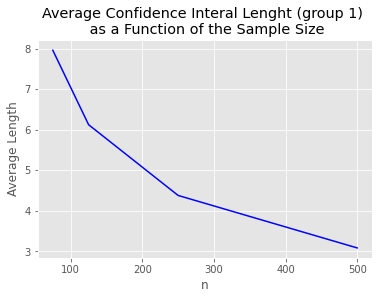

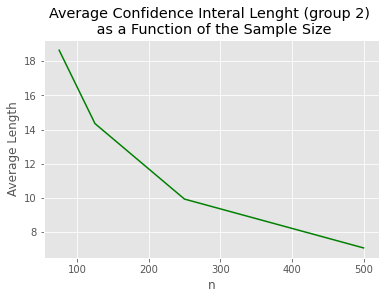

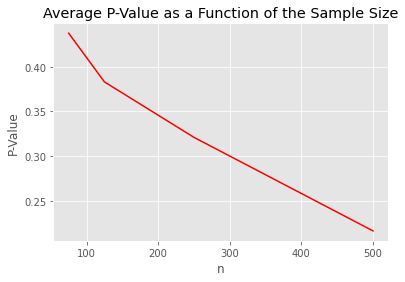

In [31]:
# group 1 - athletes who didn't win a medal
plt.plot(sample_sizes, no_won_conf_interval_len_avg, color="b")
plt.title("Average Confidence Interal Lenght (group 1) \n as a Function of the Sample Size")
plt.xlabel("n")
plt.ylabel("Average Length")
plt.show()

# group 2 - athletes who won a medal
plt.plot(sample_sizes, won_conf_interval_len_avg, color="g")
plt.title("Average Confidence Interal Lenght (group 2) \n as a Function of the Sample Size")
plt.xlabel("n")
plt.ylabel("Average Length")
plt.show()

plt.plot(sample_sizes, p_value_avg, color="r")
plt.title("Average P-Value as a Function of the Sample Size")
plt.xlabel("n")
plt.ylabel("P-Value")
plt.show()

As we can see in the graphs above, the average confidence interval length decreases as we increase the sample size. In addition, we can see that the average confidence interval length of group 2 decreases by a greater amount than group 1.

These results reflect our findings in the first part of the question when we performed the comparison with a single iteration of sample generation.

We can also see that the average p_value decreases as we increase the sample size. However, this finding is different from the results in the previous part (where we generated just one sample), in which we couldn't see any connection between the sample size and the p-value.

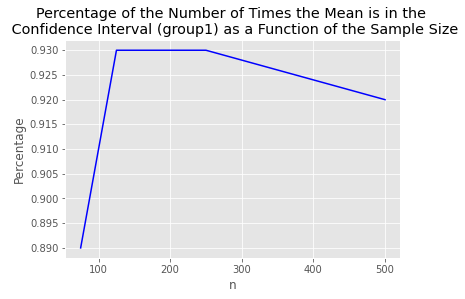

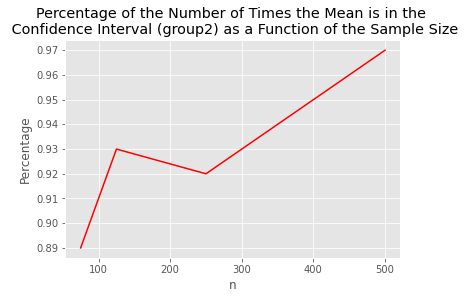

In [32]:
# group 1 - athletes who didn't win a medal
plt.plot(sample_sizes, no_won_in_conf_interval_avg, color="b")
plt.title("Percentage of the Number of Times the Mean is in the \n Confidence Interval (group1) as a Function of the Sample Size")
plt.xlabel("n")
plt.ylabel("Percentage")
plt.show()

# group 2 - athletes who won a medal
plt.plot(sample_sizes, won_in_conf_interval_avg, color="r")
plt.title("Percentage of the Number of Times the Mean is in the \n Confidence Interval (group2) as a Function of the Sample Size")
plt.xlabel("n")
plt.ylabel("Percentage")
plt.show()

As we can see in the graphs above, the percentage of the times the mean is in the confidence interval mostly increases as the sample size increases.

As we explained in the confidence intervals question, the sample mean is asymptotically Normal. Therefore, the interval has an **approximated** level of confidence (we chose $\alpha = 0.05$).

This means that as we increase n, the approximation level will approach $\alpha$ and be more accurate.

**Our results in the practical analysis indeed support the theoretical analysis.**